### Hardy-Wienberg equilibrium

Consider two alleles $a$ and $A$. Let the allele frequency for allele $a$  be $\Pr(a) = p$, and $\Pr(A)=1-p$.
Random mating (of an infinite population) gives the the following genotypes (the HW eq.)


\begin{align}
\Pr(aa) &= p^2\\
\Pr(aA) &= p(1-p)\\
\Pr(Aa) &= p(1-p)\\
\Pr(AA) &= (1-p)^2
\end{align}

From which we deduce that the heterozygosity (propotion genotypes with unequal alleles) is $H = 2p(1-p)$



### Sampling with replacement from fixed size population

Consider a population of $2N$ alleles. The next generation consist of a resample. The probability of loosing an allele in the sample, i.e. not drawing the allele in $2N$ draws, is

\begin{align}
\left(1-\frac{1}{2N} \right)^{2N} \rightarrow e^{-1} \simeq  0.37
\end{align} 

Independent of $N$ when $N$ is large!

### Genetic drift

Let $y_n$ be the event "a pair of  alleles from population $2N$, at genereation $n$, are equal". 
Let $A$ be the event "both alleles (the pair) are inherited from same parent allele of previous generation", and $\bar{A}$ its negation.

We can write the following recursion relation

\begin{align}
\Pr(y_n) &= \Pr(y_n| A ) \Pr(A) +  \Pr(y_n| \bar{A} ) \Pr(\bar{A})\\
&= 1  \frac{1}{2N} + \Pr(y_{n-1}) \left(1-\frac{1}{2N}\right)
\end{align} 

For $g_n = \Pr(y_n)$ we have,

\begin{align}
g_{n+1} &=   \frac{1}{2N} +  \left(1-\frac{1}{2N}\right) g_n
\end{align} 




\begin{align}
1-h_{n+1} &=   \frac{1}{2N} +  \left(1-\frac{1}{2N}\right) (1-h_n)\\
 &=  1- h_n  \left(1-\frac{1}{2N}\right)
\end{align} 


### Include mutation

Let $u$ be the mutation rate. 
Also, let $g'$ be $g$ as defined in the previous section (i.e. disregarding mutation).

We have
\begin{align}
g_{n+1} &=   [(1-u)^2 + u^2]g'_{n+1} + 2(1-u)u(1-g'_{n+1})\\
&=   [(1-u)^2 + u^2]\left[\left(1-g_n\right)\frac{1}{2N} + g_n\right] + 2(1-u)u\left\{1-\left[\left(1-g_n\right)\frac{1}{2N} + g_n\right]\right\}
\end{align}

Note that $(1-u)^2+u^2$ is the probability of that none or both alleles mutate, $2(1-u)u$ is the probability that only one of them mutate. 
Also note that many books, e.g. *Population Genetics* by John H. Gillespie writes this as (Eq. 2.7)

\begin{align}
g_{n+1} &=  (1-u)^2g'_{n+1}
\end{align}

#### Exact result

We have
\begin{align}
g_{n+1} &=  (1-4u +4u^2)g'_{n+1} + 2(1-u)u\\
g_{n+1} &=  4(u-0.5)^2g'_{n+1} + 2(1-u)u\\
h_{n+1} &= 4(u-0.5)^2( h_n  \left(1-\frac{1}{2N}\right) -1)+ 1 - 2(1-u)u
\end{align}


\begin{align}
h_{n+1}-h_n &= h_n \left[4(u-0.5)^2   \left(1-\frac{1}{2N}\right)-1\right] - 4(u-0.5)^2 + 1 - 2(1-u)u
    \end{align}

\begin{align}
 h_n  &= \frac{4(u-0.5)^2 +2(1-u)u-1 }{4(u-0.5)^2   \left(1-\frac{1}{2N}\right)-1}\\ 
 &= \frac{2u(1-u) }{1-4(u-0.5)^2   \left(1-\frac{1}{2N}\right)}\\ 
    \end{align}

In [2]:
using PyPlot
using FakeGeno

In [5]:
Nsnp  = 1000
Nind  = 1000
Niter = 10*Nind
theoretical_hz = 0.2
mrate = calc_mrate(Nind, theoretical_hz) # solves u(N, h_n) in equation above

pop = create_pop_random(Nsnp, Nind)
hw  = Float64[]
obs = Float64[]

for i in 1:Niter
    (obs_, hw_) = mean(heterozygote(pop),1)
    push!(hw, hw_)
    push!(obs, obs_)
    evolve_pop_once!(pop,mutationrate=mrate)
end

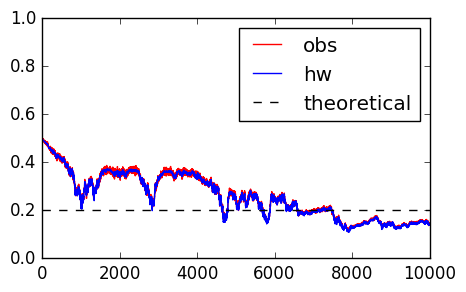

PyObject <matplotlib.legend.Legend object at 0x3135e2048>

In [6]:
fig = plt[:figure](figsize=(5,3))
ax = fig[:add_subplot](111)

t = collect(1:length(obs))
ax[:plot](t,obs,label="obs",color="red")
ax[:plot](t,hw,label="hw",color="blue")
ax[:plot]([1, length(obs)],[theoretical_hz, theoretical_hz],"--k", label="theoretical")
ax[:set_ylim]([0.,1])
ax[:legend]()

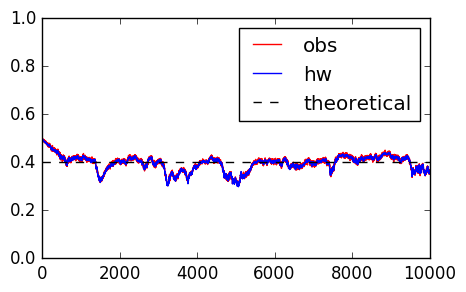

PyObject <matplotlib.legend.Legend object at 0x31a92ff60>

In [4]:
fig = plt[:figure](figsize=(5,3))
ax = fig[:add_subplot](111)

t = collect(1:length(obs))
ax[:plot](t,obs,label="obs",color="red")
ax[:plot](t,hw,label="hw",color="blue")
ax[:plot]([1, length(obs)],[theoretical_hz, theoretical_hz],"--k", label="theoretical")
ax[:set_ylim]([0.,1])
ax[:legend]()


#### Approx (only for comparrison to Gillespie's book)
Assume that $1/2N\ll 1$ and $1\ll u$ and that $O(1/2N)=O(u)$. To first order in $u$ or $1/2N$ we ahave,

\begin{align}
g_{n+1}
&=   [1-2u]\left[\left(1-g_n\right)\frac{1}{2N} + g_n\right] + 2u\left\{1-\left[\left(1-g_n\right)\frac{1}{2N} + g_n\right]\right\}\\
&=   [1-4u]\left[\left(1-g_n\right)\frac{1}{2N} + g_n\right] + 2u\\
&=   \left(1-g_n\right)\frac{1}{2N} + g_n - 4u g_n + 2u\\
&=   \frac{1}{2N} + \left(1-\frac{1}{2N}\right)g_n - 4u g_n + 2u
\end{align}



We can rewrite this in terms of the heterozygosity. Let the probability of having unequal alleles at generation $n$, i.e. the probability of having an Heterozygote individual, be $h_n = 1 - g_n$. We have

\begin{align}
h_{n+1} = \left(1-\frac{1}{2N}\right)h_n  + 4u (1-h_n)- 2u.
\end{align}

Assuming equilibrium we have,
\begin{align}
h_{n+1} - h_n= 0 = -\frac{h_n}{2N}+ 2u[1-2h_n]
\end{align}

where the terms on the right hand side is

1. decrease of h. due to genetric drifte ($-\frac{h_n}{2N}$)
2. increase of h. due mutiation [$2u (1-2h_n)$]. In Gillespie's book this becomes $2u (1-h_n)$

Equating these gives,
\begin{align}
\left(\frac{1}{2N} + 4u\right) h_n = 2u \quad \Rightarrow \quad h_n = \frac{1}{2}\frac{8un}{1+ 8 un}
\end{align}
